In [1]:
# download any image 
# import libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
photo = plt.imread('parrot.jpg')
# photo = plt.imread(r'full-path')
photo.shape

(768, 1024, 3)

In [4]:
type(photo)

numpy.ndarray

In [5]:
photo

array([[[ 3, 25, 12],
        [ 6, 28, 15],
        [ 8, 30, 17],
        ...,
        [ 0, 12,  0],
        [ 1, 13,  1],
        [ 2, 14,  4]],

       [[ 6, 28, 16],
        [10, 32, 19],
        [11, 33, 20],
        ...,
        [ 1, 13,  1],
        [ 1, 13,  1],
        [ 1, 13,  1]],

       [[10, 30, 19],
        [14, 34, 23],
        [16, 36, 24],
        ...,
        [ 1, 13,  1],
        [ 1, 13,  1],
        [ 1, 13,  1]],

       ...,

       [[ 6,  8,  3],
        [ 5, 10,  4],
        [ 6, 11,  5],
        ...,
        [ 6, 29, 13],
        [ 7, 30, 14],
        [ 8, 31, 15]],

       [[ 4,  9,  3],
        [ 5, 10,  4],
        [ 5, 10,  4],
        ...,
        [ 6, 33, 16],
        [ 7, 34, 17],
        [ 9, 36, 19]],

       [[ 5, 10,  4],
        [ 4,  9,  3],
        [ 3, 10,  3],
        ...,
        [ 9, 38, 20],
        [11, 40, 22],
        [13, 42, 24]]], shape=(768, 1024, 3), dtype=uint8)

In [6]:
np.min(photo) 

np.uint8(0)

In [7]:
np.max(photo)

np.uint8(255)

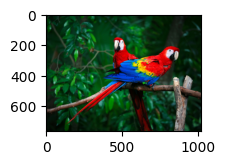

In [8]:
plt.figure(figsize=(2,2))
plt.imshow(photo)

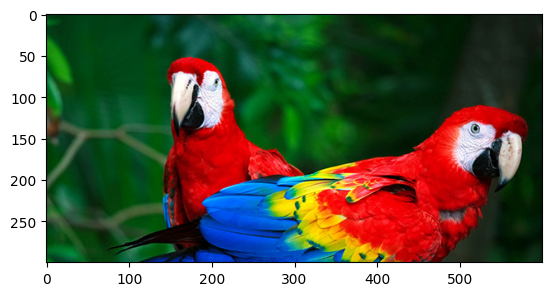

In [9]:
plt.imshow(photo[100:400, 300:900, :])
# we can save it using plt.save()

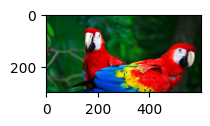

In [10]:
plt.figure(figsize=(2,2))
plt.imshow(photo[100:400, 300:900, :])

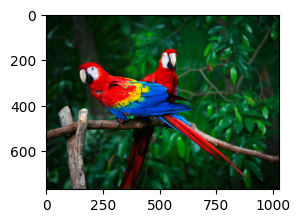

In [11]:
# horizontal flip
plt.figure(figsize=(3,3))
plt.imshow(photo[:, ::-1, :])

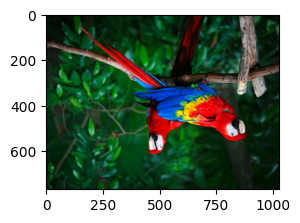

In [12]:
# vertical flip
plt.figure(figsize=(3,3))
plt.imshow(photo[::-1, :, :])

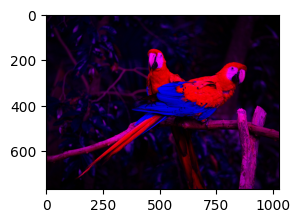

In [13]:
# sshowing only red layer

plt.figure(figsize=(3,3))
new_photo = photo.copy()
new_photo[:, :, 1:2] = 0
plt.imshow(new_photo)

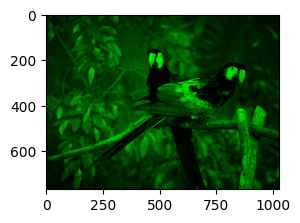

In [14]:
# sshowing only green layer

plt.figure(figsize=(3,3))
new_photo = photo.copy()
new_photo[:, :, 0:3:2] = 0
plt.imshow(new_photo)

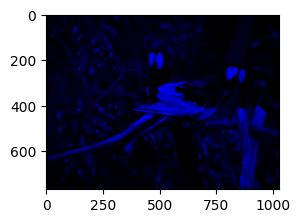

In [15]:
# sshowing only blue layer

plt.figure(figsize=(3,3))
new_photo = photo.copy()
new_photo[:, :, 0:2:1] = 0
plt.imshow(new_photo)

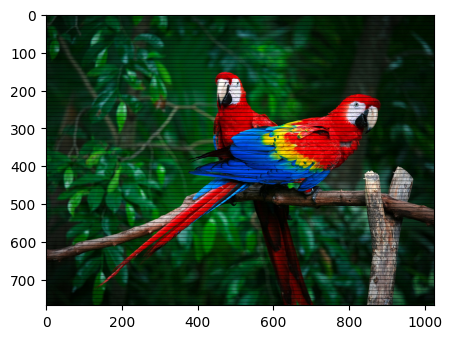

In [16]:
# Interpolation means every n no. of pixels there will be a black like

plt.figure(figsize=(5,5))
new_photo = photo.copy()
new_photo[::10, :,:] = 0
plt.imshow(new_photo)

In [17]:
# creating a spotlight

# we have a rectangular photo, to plot a spotlight, 
# we must first draw a circle inside that rectangle and the pixels outside that circle will be white

w = photo.shape[0]
h = photo.shape[1]
radius = min(w,h) // 2
radius

384

In [18]:
center_x = w // 2
center_y = h // 2
print(center_x, center_y) # center of image

384 512


In [19]:
# finding euclidean distince
# sqrt ( (x2-x1)^2  + (y2-y1)^2 )

# we calculate distance of each pixel from the center of image, if it lies between radius, we keep it else make it white

# we need to use np.mesh()
# It's like a grid ( mesh )
# using that we can make the True/False boolean matrix to get if any pixel is outside or inside the radius


In [20]:
# mesh grid example

x = np.arange(5)
y = np.arange(5)

X , Y = np.meshgrid(x,y)

X

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [21]:
Y

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

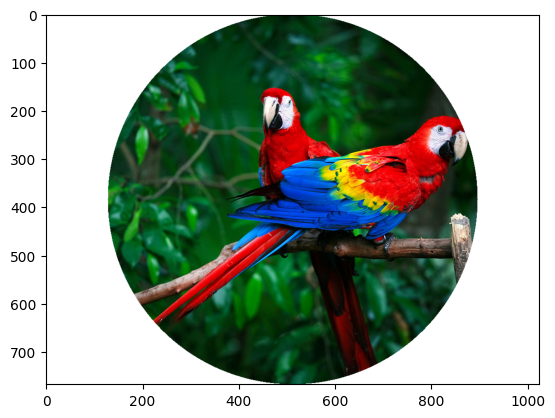

In [22]:
photocopy = photo.copy()
radius_sqr = radius ** 2
for i in range(w):
    for j in range(h) :
        dist = ( (i - center_x)**2 + (j - center_y)**2 ) 
        if dist > radius_sqr : 
            photocopy[i,j,:] = 255
plt.imshow(photocopy)

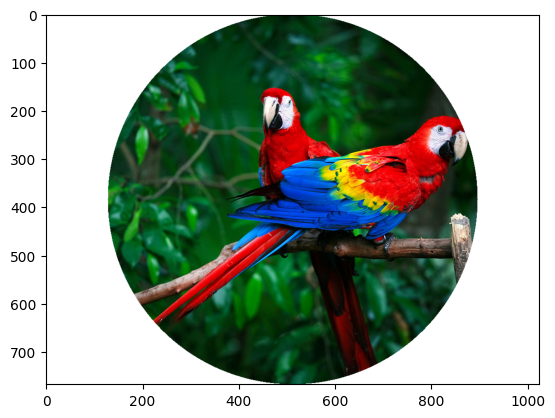

In [29]:

# copy image
photocopy = photo.copy()

h, w = photo.shape[:2]

# center and radius
cw = w // 2        # or your given value
ch = h // 2
r  = min(h,w)//2         # example radius
rsq = r**2

# meshgrid
X, Y = np.meshgrid(np.arange(w), np.arange(h))

# distance squared
dist = (X - cw)**2 + (Y - ch)**2

# mask: outside circle → white
mask = dist > rsq
photocopy[mask] = 255

plt.imshow(photocopy)
# plt.axis("off")

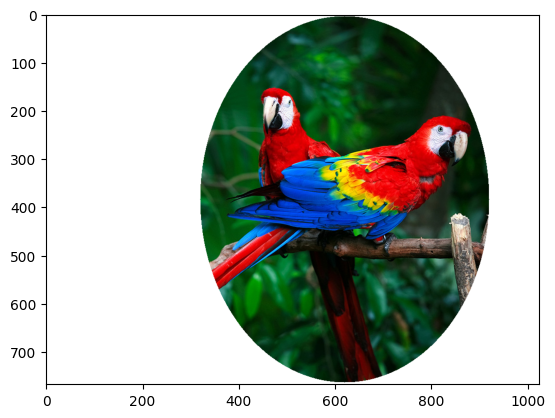

In [47]:
# Elliptical
a = 300   # horizontal radius
b = 380   # vertical radius

photocopy = photo.copy()

cw = 620
ch = h // 2

for i in range(w):     # x direction (width)
    for j in range(h): # y direction (height)
        
        dx = i - cw
        dy = j - ch
        
        ellipse_dist = (dx*dx)/(a*a) + (dy*dy)/(b*b)

        if ellipse_dist > 1:
            photocopy[j, i, :] = 255   # note j = row, i = column

plt.imshow(photocopy)


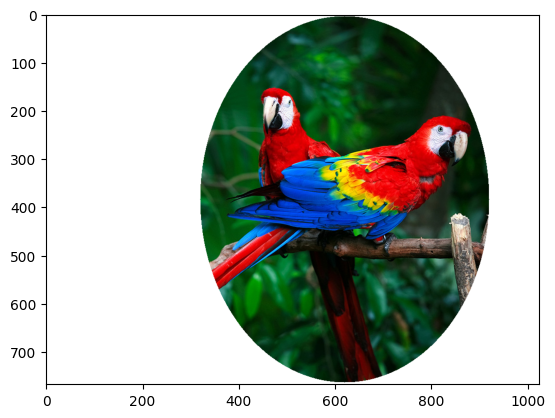

In [48]:
# OR
dx = X - cw
dy = Y - ch
ellipse_dist = (dx*dx)/(a*a) + (dy*dy)/(b*b)

mask = ellipse_dist > 1
photocopy[mask] = 255

plt.imshow(photocopy)
